# Time Series Analysis
### Problem Statement
Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

You can get the dataset here https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/


In [4]:
#importing all the required packages. These are quite the standard packages required.

import pandas as pd          #For dataframe related operations
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [5]:
#Lets import the dataset
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

In [6]:
#Always a good practice to keep a duplicate copy of the data set 
train_original=train.copy()
test_original=test.copy()

In [7]:
#Lets check at the contents of the columns
train.columns, test.columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


In [8]:
#From the above step we realized that we have a datetime column but it is in type object, so lets 
# change it to datetime object so that we can perform timeseries operations on it. If you already know
# that your dataset is having a timeseries object then we can parse those columns as timeseries while 
# reading the csv itself. 

train["Datetime"]=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [9]:
print(train.head())
test.head() #As seen we need to predict the count of the passengers for the test dataset

   ID            Datetime  Count
0   0 2012-08-25 00:00:00      8
1   1 2012-08-25 01:00:00      2
2   2 2012-08-25 02:00:00      6
3   3 2012-08-25 03:00:00      2
4   4 2012-08-25 04:00:00      2


,ID,Datetime
0,18288,2014-09-26 00:00:00
1,18289,2014-09-26 01:00:00
2,18290,2014-09-26 02:00:00
3,18291,2014-09-26 03:00:00
4,18292,2014-09-26 04:00:00


## Hypothesis test
The dataset contains timeseries data of the count of passengers on a particular service. Now to understand or forecast the count of passengers in future we can make below hypothesis.
1. We can expect an increase trend in the number of passengers as the population has an increasing trend and as JetRail is a new transportation media, more people would be interested in expereiencing it. ( check the relationship between independent variable Year vs. dependent variable passenger count)
2. We can expect higher traffic from the month of May to October as that is when most of the people travel during summer break.( check the relationship between independent variable month of May - Oct vs. dependent variable passenger count)
3. We can expect more traffic on weekdays compared to weekends for obvious reasons. ( check the relationship between independent variable Weekdays vs. dependent variable passenger count)
4. Expect more traffic during peak working hours. ( check the relationship between independent variable time of the day/ Hour vs. dependent variable passenger count)

As from above statements we can understand that there is a need to create new features from the given timeseries column. Lets do that by using the package datetime which provides an easy way to manipulate datetime objects.


In [10]:
# Lets breakdown the given timeseries object in year,month,day and hour to create more features thus
# simplifying the prediction process further
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [11]:
#Lets now get the day of the week
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']


In [12]:
#Lets get a column stating if the given date belongs to a weekend(1) or a weekday(0)

def weekend_check(row):
    if row ==5 or row ==6:
        return 1
    else:
        return 0


In [13]:
train['weekend']= train['day of week'].apply(weekend_check)

In [14]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


Alright, so now we have think we have all the features that we need for our modelling. We shall add more 
features as we progress further into the project.
The first column ID is simply constant incremental object and would not be helpful in determining the
dependent variable so lets drop that.

In [15]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.

Lets now make our first visualization to understand the trend of passenger count as the time passes.

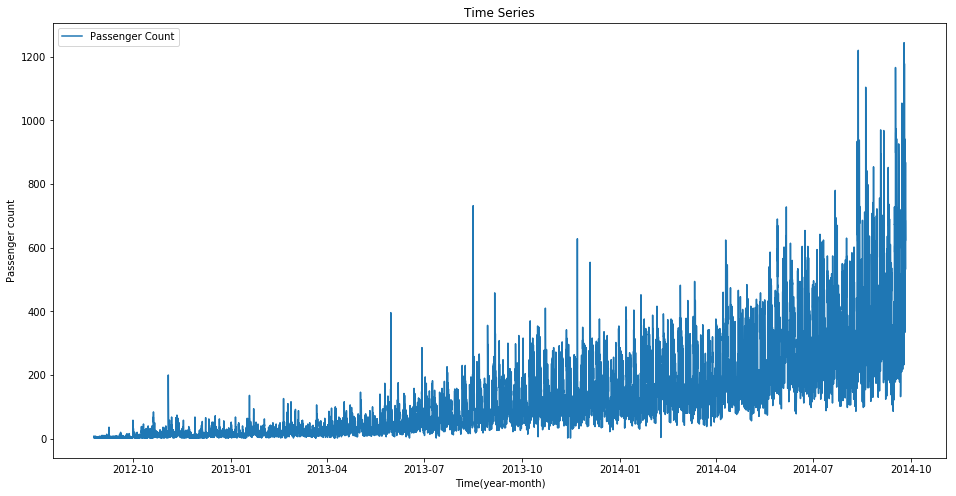

In [16]:
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

The above figure simply plots the trend of passengers count (min to max) for a particular time period.
We can understand from this plot that the datetime variable starts from 08-2012 till 10-2014. But this
plot is very noisy due to the level of granularity being too high. Lets try to drill up a bit to get a 
clear trend!

Below we peform some more exploratory data analysis to get better understanding of the data and trend

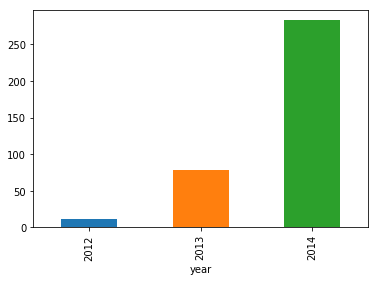

In [17]:
# Year wise count
train.groupby('year')['Count'].mean().plot.bar()

#From the below plot we can clearly see the increasing trend in passenger count with each yearb

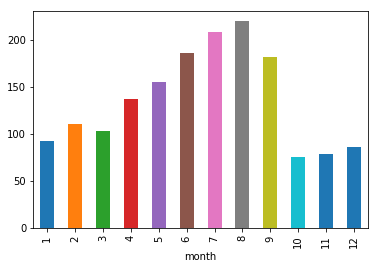

In [18]:
# Month wise count plot to check for seasonality if any

train.groupby('month')['Count'].mean().plot.bar()

#But the problem with below plot is that it is not considering year 

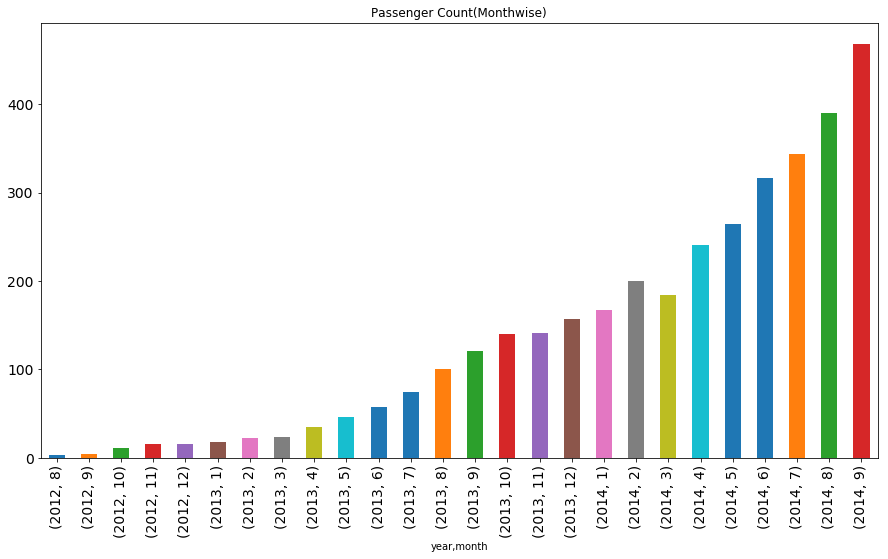

In [19]:
temp=train.groupby(['year', 'month'])['Count'].mean()
temp.plot.bar(figsize=(15,8), title= 'Passenger Count(Monthwise)', fontsize=14)

we definitely see a monthly increasing trend of customers. Lets see how the daily and hourly trend 
looks like

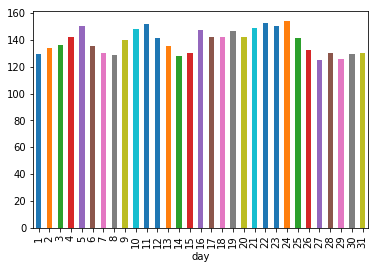

In [20]:
# daywise count
train.groupby('day')['Count'].mean().plot.bar()

# We definitely see a seasonal pattern here of traffic increasing through weekdays and going down on weekends

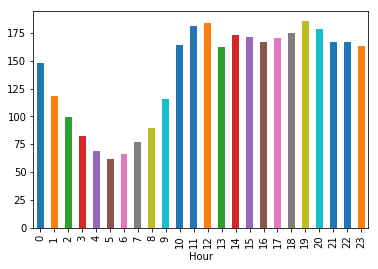

In [21]:
# hourly passenger count
train.groupby('Hour')['Count'].mean().plot.bar()

#As we can anticipate the passenger count goes down during midnight from 1-5am and then count starts going
# up again

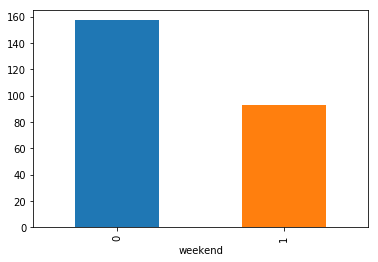

In [22]:
# Count on weekend
train.groupby('weekend')['Count'].mean().plot.bar()

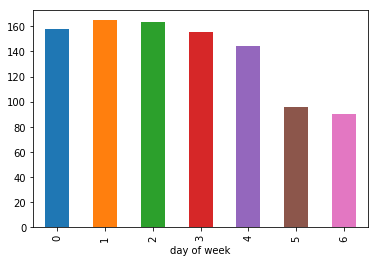

In [23]:
train.groupby('day of week')['Count'].mean().plot.bar()

From the exploration performed so far on the data we can understand that there is clearly a lot of noise in the data as it is in hourly manner and we need a more summarized data for modeling purpose making it easier and faster for the model to learn.

In [24]:
#Lets start by dropping the unnecessary ID column and summarize the dataset using model resampling 
# techniques provided by pandas.

# drop ID from train
train=train.drop('ID',1)

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

Resampling: It’s a technique similar to groupby used for creating bins/bucket of timeframes without actually grouping them.
It can be downsampled- aggregating for a time larger than the each record time, upsampled- aggregating for a time smaller than each record time. <br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html
http://benalexkeen.com/resampling-time-series-data-with-pandas/


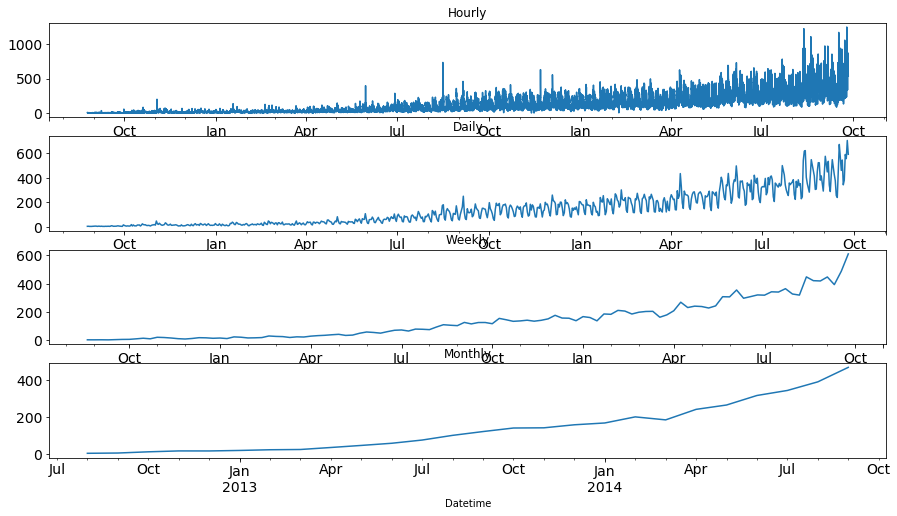

In [25]:
#Now lets plot these summarized resampled datasets

fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [26]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

# Model Building:

In [27]:
train.index.min(),train.index.max()

(Timestamp('2012-08-25 00:00:00', freq='D'),
 Timestamp('2014-09-25 00:00:00', freq='D'))

As seen above we have 25 months data, it would be a good idea to keep most of the data as part of training and rest as validation set. Lets keep the last 3 months for the validation set. Remember we are simply splitting the training dataset further in train and validation set to build our model. Later this model would be applied on the test data set given separately.

In [28]:
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']


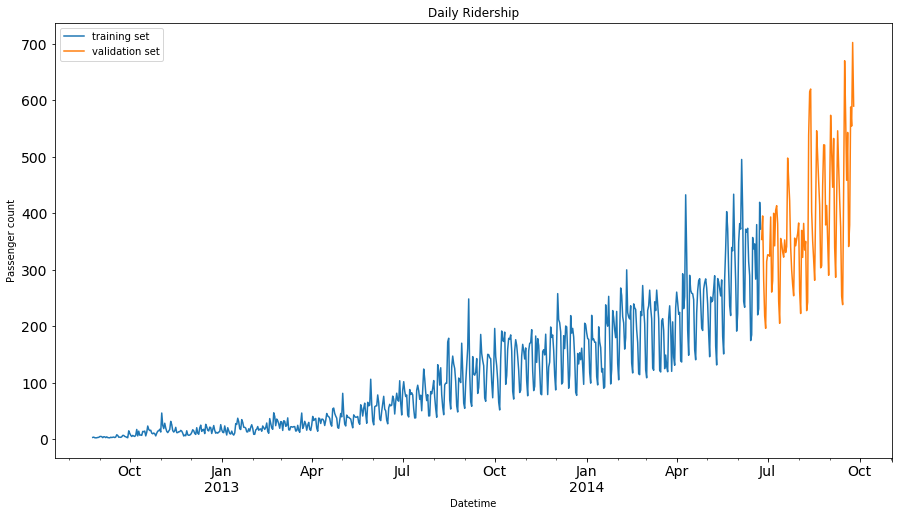

In [29]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='training set')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='validation set')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

## 2) Modeling techniques
We will look at various models now to forecast the time series . Methods which we will be discussing for the forecasting are:

i) Naive Approach<br>
ii) Moving Average <br>
iii) Simple Exponential Smoothing <br>
iv) Holt’s Linear Trend Model

### 1. Naive Approach:
In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

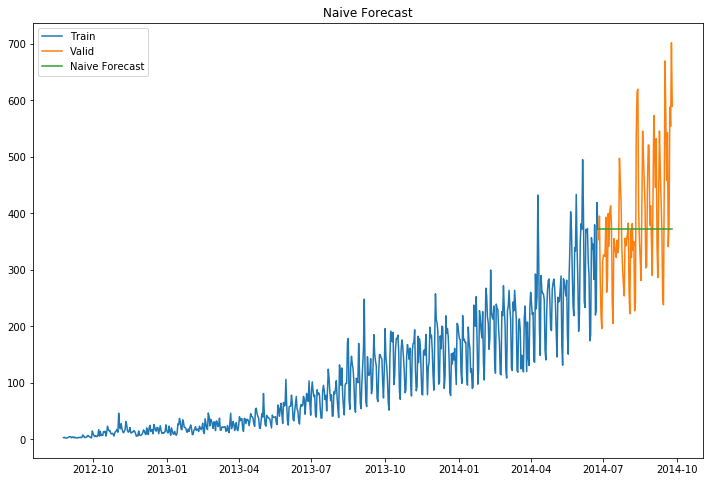

In [30]:
#Naive Approach 
y_hat = valid
naive_val = Train["Count"][-1] # take the last value of the training data set record
#y_hat["naive"]=naive_val
dd= np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index,valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


### 2.Moving Average: 
In this technique we will take the average of the passenger counts for last few time periods only.


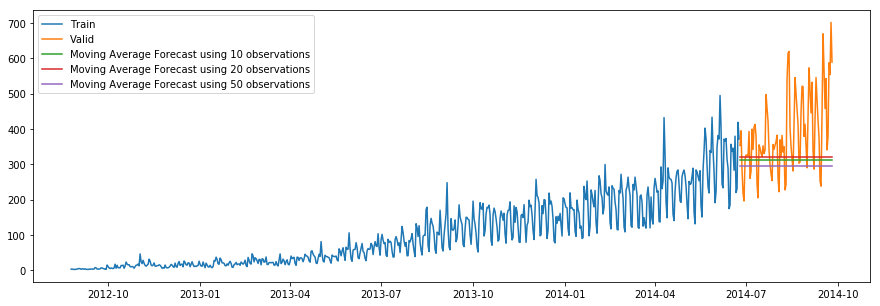

In [32]:
y_hat_avg = valid
y_hat_avg['moving_avg_fcst10'] = Train['Count'].rolling(10).mean().iloc[-1]
y_hat_avg['moving_avg_fcst20'] = Train['Count'].rolling(20).mean().iloc[-1]
y_hat_avg['moving_avg_fcst50'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_fcst10'], label='Moving Average Forecast using 10 observations')
plt.plot(y_hat_avg['moving_avg_fcst20'], label='Moving Average Forecast using 20 observations')
plt.plot(y_hat_avg['moving_avg_fcst50'], label='Moving Average Forecast using 50 observations')

plt.legend(loc='best')
plt.show()

In [33]:
rms10 = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_fcst10))
print(rms10)
rms20 = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_fcst20))
print(rms20)
rms50 = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_fcst50))
print(rms50)

134.23733308950264
130.44984977550422
144.19175679986802


As seen above the RMS value seems to be least in case of rolling average forecast of 20 days. Although it is bad compared to our naive apporach.

### 3. Simple Exponential Smoothing:
In this technique, we assign larger weights to more recent observations than to observations from the distant past. <br>
The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

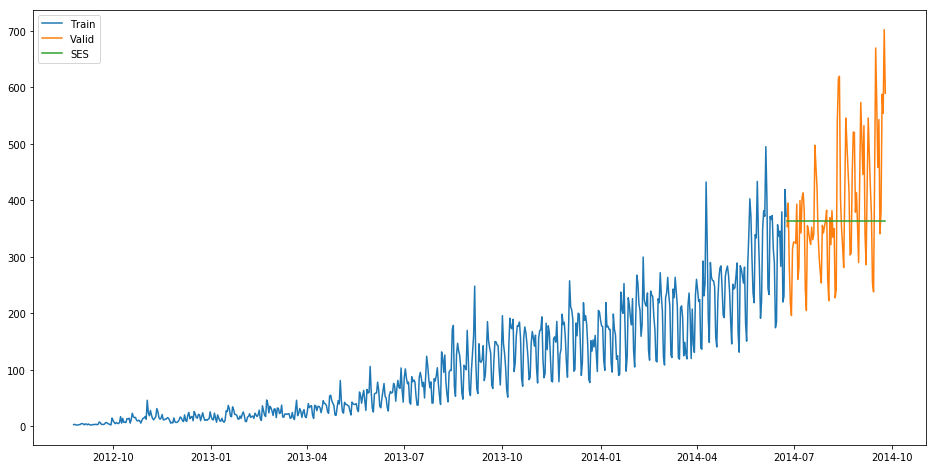

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
fit2.forecast()
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [40]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

113.43708111884514


From above we can observe that the RMSE has gone down thereby increasing the model accuracy

### 4. Holt’s Linear Trend Model: 
It is an extension of simple exponential smoothing to allow forecasting of data <b> with a trend.</b>
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

First of all let us visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts.

Observed, which is the original time series.
Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
Seasonal, which tells us about the seasonality in the time series.
Residual, which is obtained by removing any trend or seasonality in the time series.

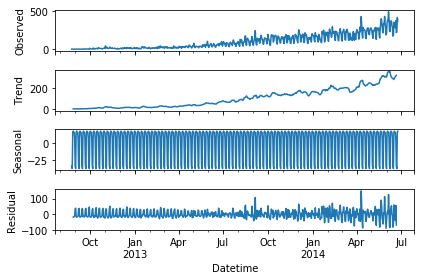

In [42]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

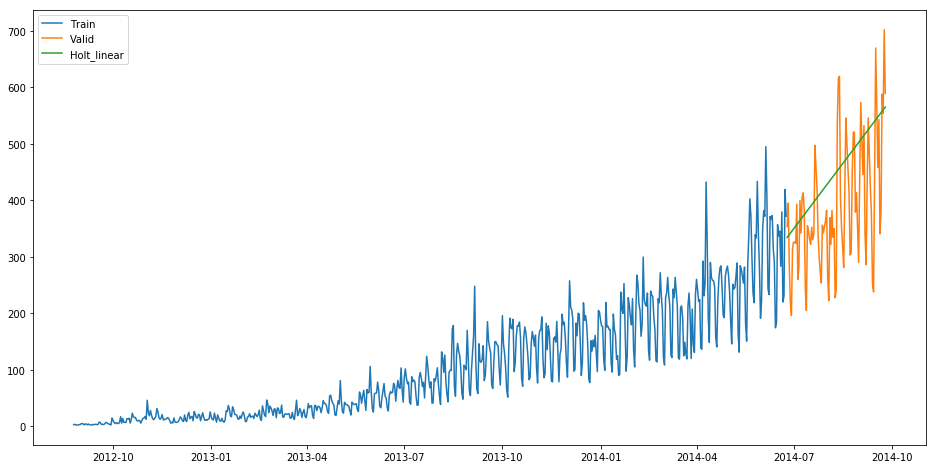

In [43]:
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

The model can then be fit on the training data by calling the fit() function.

This function allows you to either specify the smoothing coefficients of the exponential smoothing model or have them optimized. By default, they are optimized (e.g. optimized=True). These coefficients include:

smoothing_level (alpha): the smoothing coefficient for the level.
smoothing_slope (beta): the smoothing coefficient for the trend.
smoothing_seasonal (gamma): the smoothing coefficient for the seasonal component.
damping_slope (phi): the coefficient for the damped trend.

In [44]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


It can be inferred that the rmse value has decreased.

Now we will be predicting the passenger count for the test dataset using various models.

In [52]:
#First forecase using Holt Linear Trend model
predict=fit1.forecast(len(test))
test['prediction']=predict
train.head()
#As this prediction is on daily basis we need to convert that to hourly basis

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [57]:
# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()
train_original.head()

,ID,Datetime,Count,year,month,day,Hour,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,7.870093e-07


In [72]:
test.head()

,ID,year,month,day,Hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745


In [69]:
# Grouping the hourly ratio
temp=train_original.groupby(['Hour'])['ratio'].sum()
temp
# Groupby to csv format
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv("GROUPby.csv")
temp2=temp2.drop('Hour.1',1) # Extra column(1) created from the merge operation

In [78]:
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)
merge.head()

,ID_x,day,prediction,ID_y,Hour
0,18299.5,26.0,334.650767,18288,0
1,18299.5,26.0,334.650767,18289,1
2,18299.5,26.0,334.650767,18290,2
3,18299.5,26.0,334.650767,18291,3
4,18299.5,26.0,334.650767,18292,4


In [77]:
# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802


In [79]:
# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio,Count,ID
0,18299.5,26.0,334.650767,18288,0,0.044287,355.692974,18288
1,18299.5,26.0,334.650767,18289,1,0.035343,283.861602,18289
2,18299.5,26.0,334.650767,18290,2,0.029911,240.234347,18290
3,18299.5,26.0,334.650767,18291,3,0.024714,198.497058,18291
4,18299.5,26.0,334.650767,18292,4,0.020802,167.075574,18292


In [80]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1)
submission.head()

,Count,ID
0,355.692974,18288
1,283.861602,18289
2,240.234347,18290
3,198.497058,18291
4,167.075574,18292


In [81]:
# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

Let's try the Holt Winters model for prediction now

### 5. Holt winter’s model on daily time series
Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices.

One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

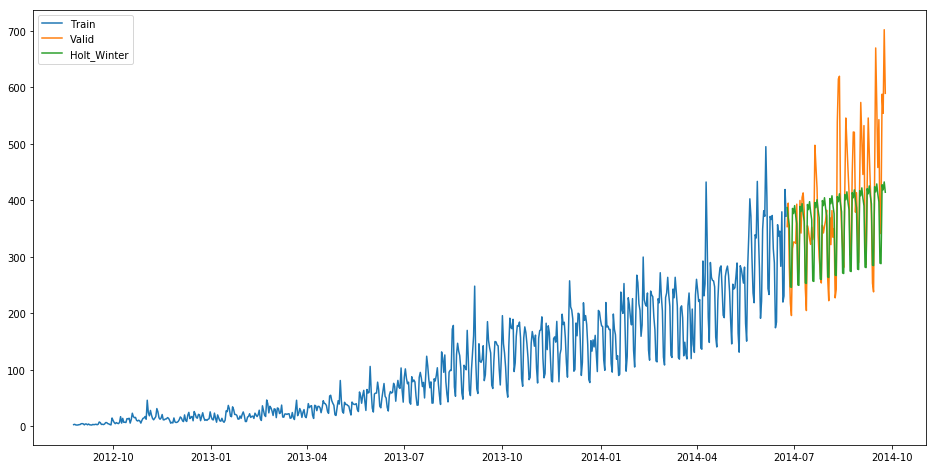

In [92]:
# fitting the model on training dataset and validating it against the validation set
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
# As our dataset is daily we consider seasonal period as a week thereby we use the value 7.
# or In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.
# more at https://otexts.org/fpp2/holt-winters.html
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [93]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

82.37467736825413


In [94]:
# Now as we have found very low RMSE value it signifies a good fit to the model. Lets try predicting 
# against the test data set and convert the prediction on hourly basis from daily basis as done before

predict=fit1.forecast(len(test))
test['prediction']=predict

# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [95]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

The above model gave very low training RMSE but didn't perform that well on test RMSE because it was able
to capture the seasonality but not trends. Lets consider a model that considers both the trends and seasonality at the same time. The model is ARIMA.